In [1]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Getting the data from https://www.levels.fyi/js/salaryData.json:
And just because it might be interesting for others to explore in CSV file format, saving the raw data as a CSV

In [2]:
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)
df.to_csv('raw.csv')

Now let's see what we got

In [3]:
df.head(20)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6
5,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,423,"Sunnyvale, CA",6,6,,157,219,47,,,7472,807,7
6,6/20/2017 10:58:51,Microsoft,60,Software Engineer,0,"Mountain View, CA",7,2,,0,0,0,,,7322,807,9
7,6/20/2017 18:49:59,Amazon,L5,Software Engineer,153939,"Seattle, WA",3,3,,101828,52111,0,,,11527,819,10
8,6/21/2017 17:27:47,Microsoft,63,Software Engineer,0,"Seattle, WA",7,11,,0,0,0,,,11527,819,11
9,6/22/2017 12:37:51,Microsoft,65,Software Engineering Manager,302,"Redmond, WA",16,13,,192,61,49,,,11521,819,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      62642 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   62642 non-null  object
 13  otherdetails             62642 non-null  object
 14  cityid                   62642 non-nul

Some intial thoughts: 

* A company would * hopefully * never factor in protected calss info into consideration for where they benchmark to market data, so going to drop gender. 
* We're doing a market data snapshot analysis and for the sake of this min project we want to focus on salary data, not concerned with gender, stocks, etc.
* data type is object and we will want to turn relevant number data into int
* non-null doesn't nessisarily mean all the data is there so I want to do more investigation on how complete the data is (lots of zeros in that base salary column, which is what we want to analyze!)
* base salary values are strange, should be seeing values in the thousands not hundreds, more investigation needed. 

In [5]:
 # drop unneeded columns gender, stocks, etc.
df = df.drop(['cityid', 'dmaid','rowNumber', 'gender','otherdetails', 'yearsatcompany', 'timestamp', 'company', 'stockgrantvalue'], axis=1)
df = df.replace("", np.nan)

Exploring that 'level' column and what's in it - I feel it could be helful in grouping our salaries

In [6]:
#exploring that level column and what's in it
level = df['level'].value_counts()
level.head(10)

L4                          5008
L5                          4861
L3                          3331
L6                          2866
Senior Software Engineer    1433
L2                          1162
Senior                      1048
L7                           916
62                           764
L1                           764
Name: level, dtype: int64

Seems like some people misunderstood the assignment here when filling out this form. This is where you submit your salary data: https://www.levels.fyi/salaries/add and there's a lot of room for creative entries. Matt Grierson's article: https://towardsdatascience.com/a-beginners-guide-to-grabbing-and-analyzing-salary-data-in-python-e8c60eab186e shows a screenshot of the form in 2020 and it appears they used to ask for an entry in thousands. 

To start, I do know I want to exclude contractors since that is an option on the form. Their overall compensation is structured much differently than employee compensation to take into account the contractor is paying their own taxes, Heath Care, etc. 


In [7]:
#exclude any contractors
df.drop(df[(df['level']=='Contractor')].index, inplace=True)

More exploring, looking at null values

In [8]:
df.isnull().sum()

level                        0
title                        0
totalyearlycompensation      0
location                     0
yearsofexperience            0
tag                        786
basesalary                   0
bonus                        0
dtype: int64

Exploring what this 'tag' field is:

In [9]:
#exploring what this 'tag' is
df['tag'].value_counts()

Full Stack                        11379
Distributed Systems (Back-End)    10837
API Development (Back-End)         6276
ML / AI                            4204
Web Development (Front-End)        2970
                                  ...  
Sr. Marketing Manager                 1
Firmware engineer                     1
Technical product manager             1
SaaS, Services                        1
Product Infra                         1
Name: tag, Length: 3274, dtype: int64

In [10]:
#converting to numbers
df[['yearsofexperience','basesalary','bonus','totalyearlycompensation']] = df[['yearsofexperience','basesalary','bonus','totalyearlycompensation']].apply(pd.to_numeric)

In [11]:
#quickstats
df.describe()

,totalyearlycompensation,yearsofexperience,basesalary,bonus
count,6.263300e+04,62633.000000,6.263300e+04,62633.000000
mean,3.175765e+03,7.190826,1.798385e+03,242.352019
std,3.878154e+04,6.436993,1.927331e+04,3709.453049
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.160000e+02,3.000000,8.800000e+01,1.000000
50%,1.830000e+02,6.000000,1.310000e+02,13.000000
75%,2.690000e+02,10.000000,1.810000e+02,27.000000
max,3.386013e+06,90.000000,2.057772e+06,384026.000000


Now let's look into the zero base salary values

In [15]:
#still seeing $0 min base salary
df[df['basesalary'] == 0].count()

level                      2304
title                      2304
totalyearlycompensation    2304
location                   2304
yearsofexperience          2304
tag                        2214
basesalary                 2304
bonus                      2304
dtype: int64

And making the decision to remove zeros from the dataset:

In [16]:
df.drop(df[df['basesalary'] == 0].index, inplace=True)
df.describe()

,totalyearlycompensation,yearsofexperience,basesalary,bonus
count,6.032900e+04,60329.000000,6.032900e+04,60329.000000
mean,3.297044e+03,7.173432,1.867066e+03,251.606110
std,3.951010e+04,6.432306,1.963463e+04,3779.315631
min,3.000000e+00,0.000000,1.000000e+00,0.000000
25%,1.240000e+02,3.000000,9.300000e+01,3.000000
50%,1.880000e+02,5.000000,1.340000e+02,14.000000
75%,2.740000e+02,10.000000,1.840000e+02,27.000000
max,3.386013e+06,90.000000,2.057772e+06,384026.000000


It's also good to remove outliers from our dataset 

In [27]:
#Remove outliers from basesalary: 

df = df[df['basesalary'].between(df['basesalary'].quantile(.05),df['basesalary'].quantile(.95))]

the source data was gathered via a question that asked people to enter their base salary (yearly) and bonus in a entry that assumed `.000` at the end - 
so I think a 75 in the base salary = 75,000 - let's multiply the baseSalary and bonus by 1000 to get rid of this assumption

see https://towardsdatascience.com/a-beginners-guide-to-grabbing-and-analyzing-salary-data-in-python-e8c60eab186e for their screen grab of the survey


In [28]:
df['basesalary']= df['basesalary'] * 1000
df['bonus']= df['bonus'] * 1000

In [30]:
#yay no more working for free
df.describe()

,totalyearlycompensation,yearsofexperience,basesalary,bonus
count,5.436900e+04,54369.000000,54369.000000,5.436900e+04
mean,3.527174e+02,7.084386,139635.049385,4.554559e+04
std,7.640248e+03,6.357534,53428.306026,1.140994e+06
min,4.500000e+01,0.000000,45000.000000,0.000000e+00
25%,1.300000e+02,3.000000,97000.000000,4.000000e+03
50%,1.880000e+02,5.000000,134000.000000,1.400000e+04
75%,2.620000e+02,10.000000,178000.000000,2.700000e+04
max,1.160132e+06,90.000000,273000.000000,1.166380e+08


In [31]:
df.groupby('title').max()

/var/folders/zr/p3dmj0t57nq_9sd5gmyrfgy40000gq/T/ipykernel_10218/1117775517.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby('title').max()


,level,totalyearlycompensation,location,yearsofexperience,basesalary,bonus
title,,,,,,
Business Analyst,l4,484,"Zurich, ZH, Switzerland",57,267000,186000
Data Scientist,x7,69751,"Zurich, ZH, Switzerland",42,273000,41981000
Hardware Engineer,technical leader,778,"hod hasharon, HM, Israel",58,273000,433000
Human Resources,x7,8834,"Zurich, ZH, Switzerland",37,272000,129000
Management Consultant,senior consultant,572,"Zurich, ZH, Switzerland",35,271000,309000
Marketing,senior manager,1204,"Zurich, ZH, Switzerland",43,272000,148000
Mechanical Engineer,l3,647,"York, PA",48,270000,170000
Product Designer,Сontractor,1169,"Zurich, ZH, Switzerland",90,273000,174000
Product Manager,x8,423635,"Zurich, ZH, Switzerland",57,273000,116638000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54369 entries, 0 to 62641
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   level                    54369 non-null  object
 1   title                    54369 non-null  object
 2   totalyearlycompensation  54369 non-null  int64 
 3   location                 54369 non-null  object
 4   yearsofexperience        54369 non-null  int64 
 5   tag                      54001 non-null  object
 6   basesalary               54369 non-null  int64 
 7   bonus                    54369 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.7+ MB


In [37]:
#see quick stats again with outliers removed from total comp
df.describe()

,totalyearlycompensation,yearsofexperience,basesalary,bonus
count,5.436900e+04,54369.000000,54369.000000,5.436900e+04
mean,3.527174e+02,7.084386,139635.049385,4.554559e+04
std,7.640248e+03,6.357534,53428.306026,1.140994e+06
min,4.500000e+01,0.000000,45000.000000,0.000000e+00
25%,1.300000e+02,3.000000,97000.000000,4.000000e+03
50%,1.880000e+02,5.000000,134000.000000,1.400000e+04
75%,2.620000e+02,10.000000,178000.000000,2.700000e+04
max,1.160132e+06,90.000000,273000.000000,1.166380e+08


In [38]:
#also noticing there's a 90 years of experience data point, let's look into that
df[df['yearsofexperience'] > 50].head(20)
#After looking at this I think I'll keep in in the dataset - total of 8 with experience over 50 years. I think I'll create category buckets to take care of this though

,level,title,totalyearlycompensation,location,yearsofexperience,tag,basesalary,bonus
502,Senior Director - I Band,Product Manager,184,"New York, NY",57,NaN,115000,69000
32542,Technical Leader 2,Solution Architect,111,"Ann Arbor, MI",51,Distributed Systems (Back-End),91000,16000
33090,Grade 6,Hardware Engineer,296,"San Jose, CA",58,Computer Architecture,224000,72000
33950,Band 9,Software Engineer,151,"New York, NY",51,Mainframe,147000,0
40752,Band 9,Business Analyst,142,"San Jose, CA",57,Internal,142000,0
41218,L9,Software Engineer,170,"Hillsboro, OR",53,DevOps,94000,48000
47788,5,Product Designer,141,"Crapo, MD",90,Interaction Design,139000,0


In [39]:
df.groupby("title").describe()

totalyearlycompensation              \
                                               count        mean   
title                                                              
Business Analyst                               797.0  135.967378   
Data Scientist                                2271.0  263.848085   
Hardware Engineer                             2021.0  211.741217   
Human Resources                                322.0  211.776398   
Management Consultant                          890.0  154.512360   
Marketing                                      658.0  195.281155   
Mechanical Engineer                            460.0  162.204348   
Product Designer                              1363.0  204.985326   
Product Manager                               3963.0  447.484986   
Recruiter                                      427.0  155.854801   
Sales                                          405.0  218.918519   
Software Engineer                            35662.0  354.218945   
Software Engineering Manager                  2808.0  813.099715   
Solution Architect                            1031.0  208.511154   
Technical Program Manager                     1291.0  227.945778   

                                                                         \
                                       std   min     25%    50%     75%   
title                                                                     
Business Analyst                 68.533867  46.0   87.00  120.0  167.00   
Data Scientist                 1901.998986  45.0  130.00  182.0  254.00   
Hardware Engineer               103.713375  47.0  138.00  190.0  262.00   
Human Resources                 490.800611  47.0  111.50  169.5  241.00   
Management Consultant            74.178155  45.0   98.00  140.0  198.75   
Marketing                       101.057385  45.0  125.00  178.0  243.75   
Mechanical Engineer              90.567165  45.0   99.00  139.0  205.25   
Product Designer                103.888762  46.0  131.00  188.0  254.00   
Product Manager                7257.046850  46.0  151.00  214.0  288.00   
Recruiter                        72.940792  46.0  102.00  140.0  192.50   
Sales                           115.048594  52.0  132.00  200.0  281.00   
Software Engineer              8098.734458  45.0  128.00  183.0  254.00   
Software Engineering Manager  14822.641585  45.0  193.75  277.5  387.00   
Solution Architect               93.118046  49.0  139.00  195.0  263.00   
Technical Program Manager       106.011094  55.0  155.00  216.0  277.50   

                                        yearsofexperience             ...  \
                                    max             count       mean  ...   
title                                                                 ...   
Business Analyst                  484.0             797.0   5.799247  ...   
Data Scientist                  69751.0            2271.0   5.013210  ...   
Hardware Engineer                 778.0            2021.0   8.085601  ...   
Human Resources                  8834.0             322.0  10.093168  ...   
Management Consultant             572.0             890.0   7.321348  ...   
Marketing                        1204.0             658.0   9.246201  ...   
Mechanical Engineer               647.0             460.0   5.854348  ...   
Product Designer                 1169.0            1363.0   7.577403  ...   
Product Manager                423635.0            3963.0   8.864244  ...   
Recruiter                         497.0             427.0   8.065574  ...   
Sales                             958.0             405.0   8.972840  ...   
Software Engineer             1160132.0           35662.0   6.013796  ...   
Software Engineering Manager   685150.0            2808.0  13.817664  ...   
Solution Architect                680.0            1031.0  12.594568  ...   
Technical Program Manager        1679.0            1291.0  12.003098  ...   

                             basesalary              bonus        

In [40]:
#defining function yoe_filter 
def yoe_filter(x):
    if x <= 1:
        return 'Entry'
    if (x > 1 and x <= 5):
        return 'Associate'
    if (x > 5 and x <= 10):
        return 'Mid'
    if x > 10:
        return 'Senior'
#applying the filter function to 'Salary' column 
df['LevelBucket'] = df['yearsofexperience'].apply(yoe_filter)

In [41]:
#Let's also categorize location
#defining function location_categories 
# Define your location categories and their corresponding keywords
location_categories = {
    'West': ['WA', 'CA', 'OR', 'NV', 'ID', 'MT', 'WY', 'CO', 'AZ', 'UT', 'AK', 'HI'],
    'MidWest': ["ND", "SD", "NE", 'KS', 'MO', 'IA', 'MN', 'WI', 'MI', 'IL', 'IN', 'OH'],
    'Southern': ['MD', 'DE', 'VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'FL', 'GA', 'AL', 'MS', 'LA', 'AK', 'TX', 'OK'],
    'East': ['ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT', 'DE', 'MD']
}

# Function to categorize locations from text
def categorize_regions(text):
    for category, keywords in location_categories.items():
        for keyword in keywords:
            if keyword in text:
                return category
    return None  # Return None if no category matches


# Apply the categorize_locations function to the 'Text' column and create a new column 'Location Category'
df['region'] = df['location'].apply(categorize_regions)

In [44]:
df.tail(20)

,level,title,totalyearlycompensation,location,yearsofexperience,tag,basesalary,bonus,LevelBucket,region
62621,64,Software Engineer,267,"Redmond, WA",17,API Development (Back-End),189000,40000,Senior,West
62622,62,Software Engineer,202,"Redmond, WA",3,Distributed Systems (Back-End),146000,31000,Associate,West
62623,L4,Software Engineer,89,"Pasir Ris, SG, Singapore",7,ML / AI,62000,17000,Mid,None
62624,L5,Software Engineer,99,"Dublin, DN, Ireland",9,Site Reliability (SRE),61000,21000,Mid,None
62625,E3,Software Engineer,53,"Barcelona, CT, Spain",7,Distributed Systems (Back-End),52000,0,Mid,None
62626,64,Software Engineer,101,"Hyderabad, TS, India",7,Full Stack,76000,5000,Mid,None
62627,Manager,Software Engineering Manager,92,"Frankfurt, HE, Germany",5,Full Stack,81000,11000,Associate,None
62628,Analyst,Software Engineer,135,"London, EN, United Kingdom",3,API Development (Back-End),116000,19000,Associate,None
62629,Senior Associate,Software Engineer,99,"West McLean, VA",2,Full Stack,93000,6000,Associate,Southern
62630,63,Software Engineer,73,"Prague, PR, Czech Republic",15,Distributed Systems (Back-End),58000,5000,Senior,None


In [45]:
df_simplified = df.drop(['level', 'totalyearlycompensation', 'yearsofexperience', 'location', 'tag'], axis=1)

array([[<Axes: title={'center': 'basesalary'}>]], dtype=object)

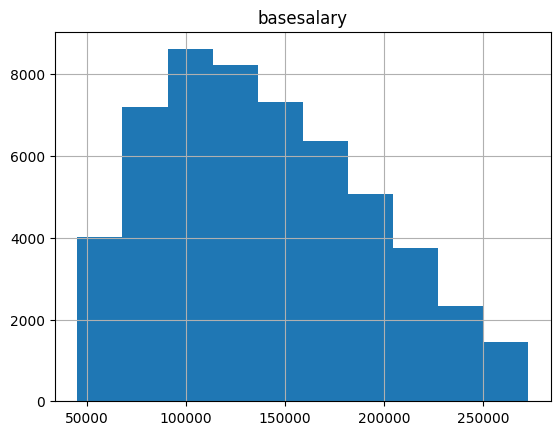

In [46]:
df_simplified.hist(column='basesalary')

Above we see a skewed distribution of all base salaries - we can infer that wages are concentrated around that $100K range. This makes sense, there's more people working in the entry-mid level jobs than there are in the senior jobs which are better paid. 

Let's put this all together and create our bands - below we are going to group by the job title first, then by the level bucket we created from years of experience data. We want to see the average, min, 25, 50, 75 percentiles and max of each band.



In [58]:
#let's get a litte more specific and throw level bucket as a grouping in there
df_simplified.groupby(["title", "LevelBucket"]).describe()

basesalary                 \
                                              count           mean   
title                        LevelBucket                             
Business Analyst             Associate        317.0  104952.681388   
                             Entry            156.0   82500.000000   
                             Mid              201.0  116985.074627   
                             Senior           123.0  136414.634146   
Data Scientist               Associate       1016.0  135273.622047   
                             Entry            469.0  123690.831557   
                             Mid              552.0  152996.376812   
                             Senior           234.0  160961.538462   
Hardware Engineer            Associate        629.0  126837.837838   
                             Entry            243.0  112378.600823   
                             Mid              592.0  149858.108108   
                             Senior           557.0  164450.628366   
Human Resources              Associate         73.0  106095.890411   
                             Entry             15.0   69800.000000   
                             Mid              113.0  140212.389381   
                             Senior           121.0  154066.115702   
Management Consultant        Associate        279.0  119720.430108   
                             Entry            146.0   84445.205479   
                             Mid              259.0  145216.216216   
                             Senior           206.0  158417.475728   
Marketing                    Associate        185.0  116870.270270   
                             Entry             33.0   89484.848485   
                             Mid              216.0  146064.814815   
                             Senior           224.0  162941.964286   
Mechanical Engineer          Associate        164.0  118579.268293   
                             Entry             95.0   97221.052632   
                             Mid              134.0  128268.656716   
                             Senior            67.0  139119.402985   
Product Designer             Associate        486.0  129518.518519   
                             Entry            114.0  109236.842105   
                             Mid              431.0  150846.867749   
                             Senior           332.0  155036.144578   
Product Manager              Associate       1094.0  140213.893967   
                             Entry            301.0  118794.019934   
                             Mid             1294.0  148720.247295   
                             Senior          1274.0  163938.775510   
Recruiter                    Associate        163.0  103656.441718   
                             Entry              8.0   59250.000000   
                             Mid              155.0  125316.129032   
                             Senior           101.0  136732.673267   
Sales                        Associate        115.0  101539.130435   
                             Entry             30.0   84333.333333   
                             Mid              134.0  125626.865672   
                             Senior           126.0  148873.015873   
Software Engineer            Associate      13101.0  135035.722464   
                             Entry           7557.0  115845.308985   
                             Mid             8857.0  146346.618494   
                             Senior          6147.0  157428.176346   
Software Engineering Manager Associate        240.0  159695.833333   
                             Entry             15.0  128400.000000   
                             Mid              801.0  160630.461923   
                             Senior          1752.0  166062.785388   
Solution Architect           Associate        158.0  124215.189873   
                             Entry             52.0   99557.692308   
                             Mid              243.0

Now let's get even more specific and break down by title, LevelBucket, and Region. 

In [60]:
#By region:
df_simplified.groupby(["title", "LevelBucket", "region"]).describe()

basesalary                 \
                                                    count           mean   
title                     LevelBucket region                               
Business Analyst          Associate   East           52.0   90019.230769   
                                      MidWest        17.0   97000.000000   
                                      Southern       45.0  101333.333333   
                                      West          155.0  115329.032258   
                          Entry       East           31.0   87580.645161   
...                                                   ...            ...   
Technical Program Manager Mid         West          284.0  156130.281690   
                          Senior      East           61.0  165180.327869   
                                      MidWest        18.0  139500.000000   
                                      Southern       76.0  146763.157895   
                                      West          427.0  166653.395785   

                                                                       \
                                                         std      min   
title                     LevelBucket region                            
Business Analyst          Associate   East      32331.306012  45000.0   
                                      MidWest   25918.140365  53000.0   
                                      Southern  38635.828873  50000.0   
                                      West      44969.269403  45000.0   
                          Entry       East      21486.079514  54000.0   
...                                                      ...      ...   
Technical Program Manager Mid         West      49906.278933  58000.0   
                          Senior      East      50459.062020  72000.0   
                                      MidWest   46896.945843  66000.0   
                                      Southern  57234.457785  55000.0   
                                      West      50154.332298  55000.0   

                                                                              \
                                                     25%       50%       75%   
title                     LevelBucket region                                   
Business Analyst          Associate   East       71750.0   88500.0  101250.0   
                                      MidWest    80000.0  101000.0  116000.0   
                                      Southern   72000.0   90000.0  114000.0   
                                      West       80000.0  108000.0  142000.0   
                          Entry       East       74000.0   84000.0  101500.0   
...                                                  ...       ...       ...   
Technical Program Manager Mid         West      117000.0  151500.0  193000.0   
                          Senior      East      118000.0  153000.0  213000.0   
                                      MidWest   101000.0  138000.0  163000.0   
                                      Southern  100750.0  140000.0  182250.0   
                                      West      126000.0  167000.0  204000.0   

                                                          bonus                \
                                                     max  count          mean   
title                     LevelBucket region                                    
Business Analyst          Associate   East      237000.0   52.0  13096.153846   
                                      MidWest   145000.0   17.0   6294.117647   
                                      Southern  208000.0   45.0   8266.666667   
                                      West      259000.0  155.0  13290.322581   
                          Entry       East      142000.0   31.0  11000.000000   
...                                                  ...    ...           ...   
Technical Program Manager Mid         West      272000.0  284.0  20450.704225   
                          Se

In [62]:
#splitting out the data sets into two - one for base salary and the other for bonus
salarybands_base = df_simplified.groupby(["title", "LevelBucket"])['basesalary'].describe()
salarybands_bonus = df_simplified.groupby(["title", "LevelBucket"])['bonus'].describe()

In [63]:
salarybands_base.head()


count           mean           std      min  \
title            LevelBucket                                                 
Business Analyst Associate     317.0  104952.681388  40856.273639  45000.0   
                 Entry         156.0   82500.000000  27827.463807  45000.0   
                 Mid           201.0  116985.074627  43622.526017  47000.0   
                 Senior        123.0  136414.634146  56320.500712  53000.0   
Data Scientist   Associate    1016.0  135273.622047  49228.710565  45000.0   

                                  25%       50%       75%       max  
title            LevelBucket                                         
Business Analyst Associate    75000.0   98000.0  123000.0  259000.0  
                 Entry        60000.0   75500.0  102000.0  184000.0  
                 Mid          83000.0  110000.0  144000.0  267000.0  
                 Senior       90500.0  131000.0  178000.0  266000.0  
Data Scientist   Associate    95000.0  130000.0  169250.0  273000.0

In [64]:
salarybands_bonus.head()

count          mean           std  min     25%  \
title            LevelBucket                                                    
Business Analyst Associate     317.0  11681.388013  15594.223633  0.0  3000.0   
                 Entry         156.0   8070.512821  10296.327049  0.0  2000.0   
                 Mid           201.0  14243.781095  19819.567948  0.0  1000.0   
                 Senior        123.0  20341.463415  26208.129532  0.0  3000.0   
Data Scientist   Associate    1016.0  15630.905512  17753.500718  0.0  3000.0   

                                  50%      75%       max  
title            LevelBucket                              
Business Analyst Associate     8000.0  15000.0  151000.0  
                 Entry         5500.0  10000.0   71000.0  
                 Mid           9000.0  19000.0  186000.0  
                 Senior       13000.0  31000.0  170000.0  
Data Scientist   Associate    13000.0  21000.0  250000.0

In [65]:
df_simplified.to_csv('bands.csv')

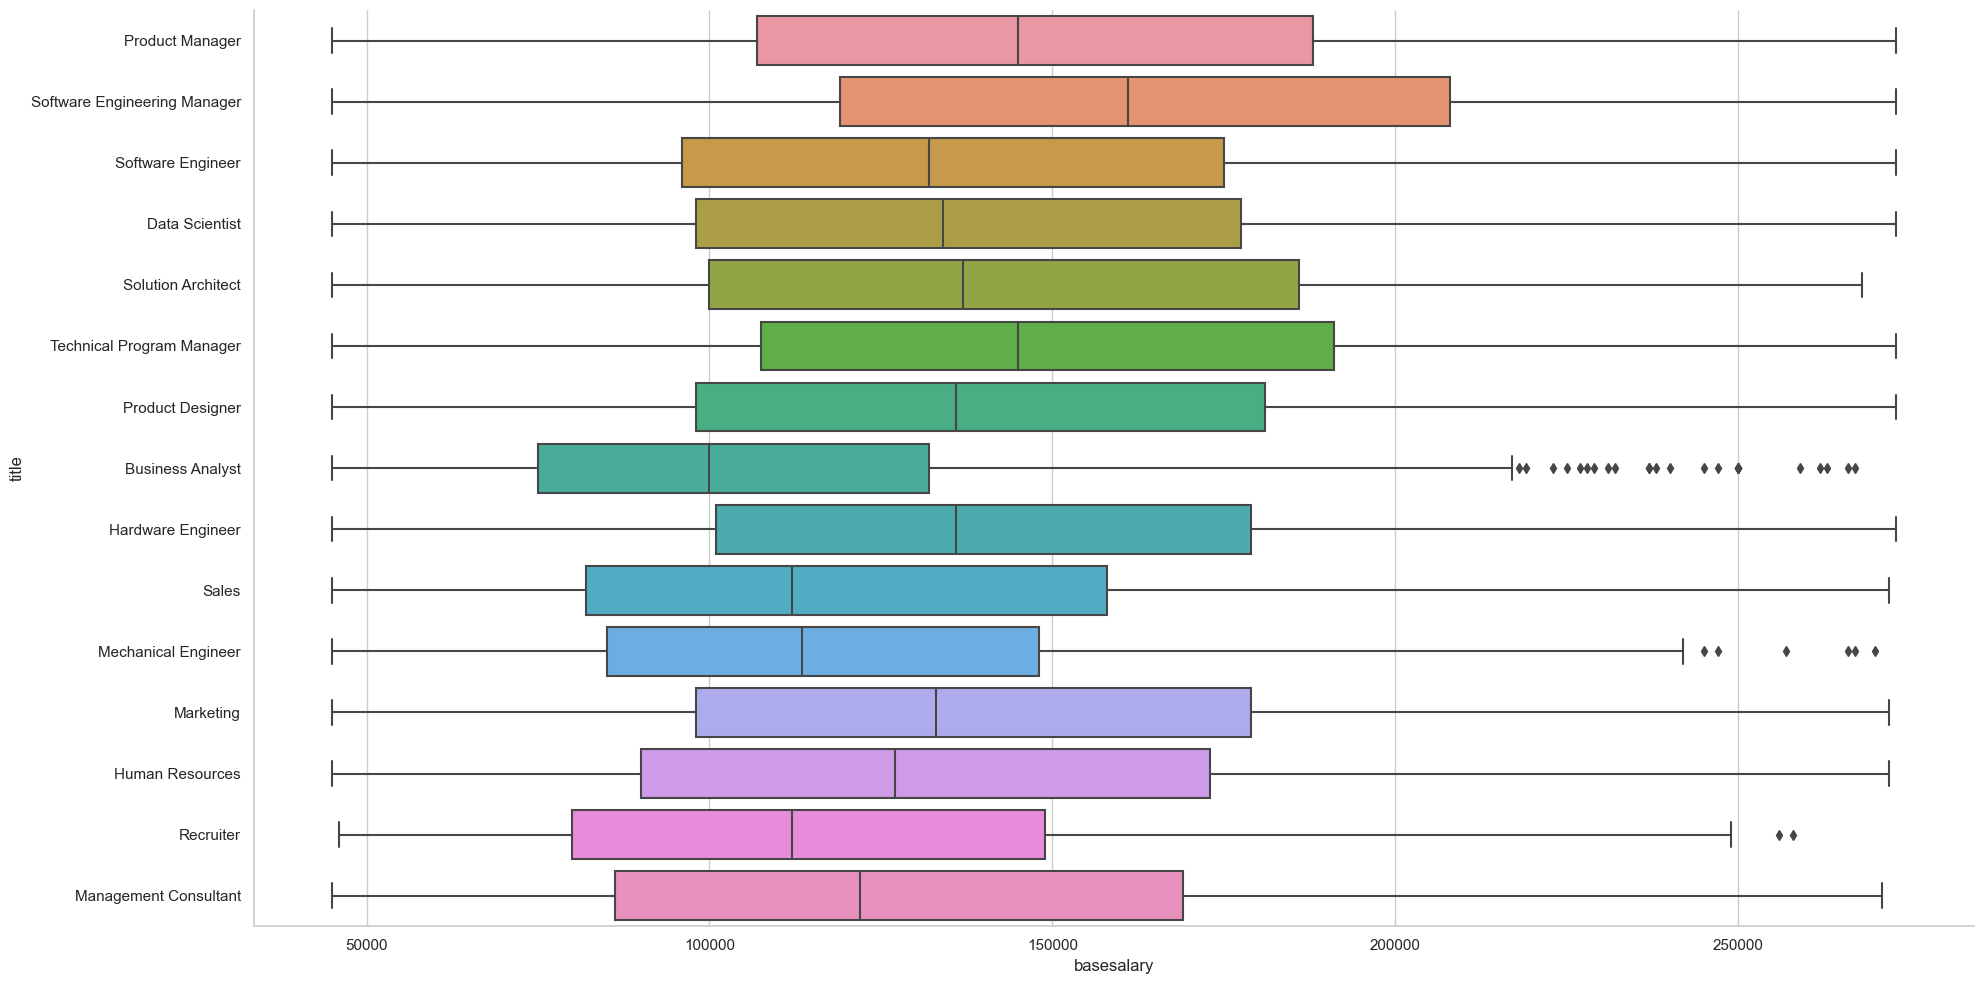

In [54]:
#chart the bands: 

sns.set(style="whitegrid")

g = sns.catplot(data=df_simplified, x="basesalary", y="title", kind="box", height=10, aspect=2, margin_titles=True)

Let's use the Product Manager as the job title we want to drill down to: 

In [55]:

pm = df_simplified[df_simplified["title"] == "Product Manager"]
pm.head()

,title,basesalary,bonus,LevelBucket,region
0,Product Manager,160000,9000,Entry,West
2,Product Manager,126000,0,Mid,West
38,Product Manager,143000,18000,Senior,West
41,Product Manager,136000,13000,Mid,West
53,Product Manager,93000,26000,Associate,West


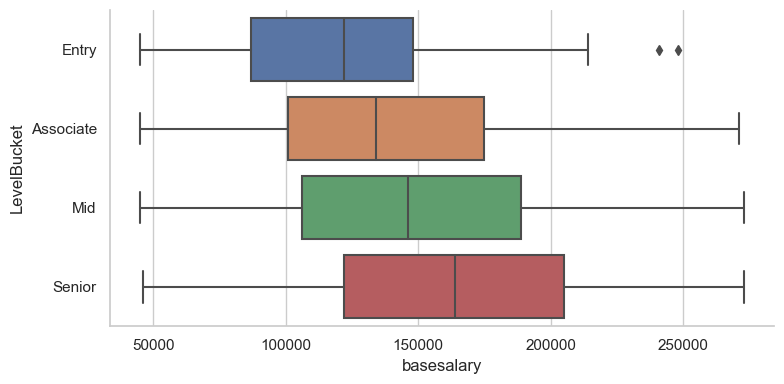

In [56]:
sns.set(style="whitegrid")

g = sns.catplot(kind = 'box', data=pm, x="basesalary", y="LevelBucket", height=4, aspect=2, margin_titles=True, order=("Entry", "Associate", "Mid", "Senior"))
